## Prophet Forecasting on Merged General Dam Dataset (with Rainfall & Consumption)

Series([], dtype: float64)


16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:23 - cmdstanpy - INFO - Chain [1] done processing


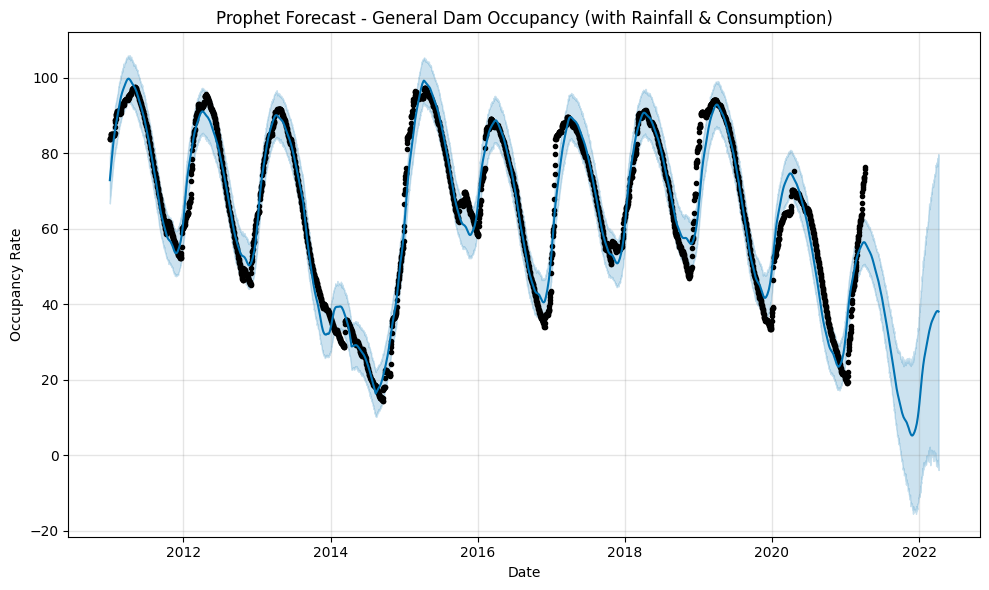

Prophet MAE (Test Set): 18.37
Prophet RMSE (Test Set): 20.03
Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_general.pkl


In [ ]:
## Prophet Forecasting on Merged General Dam Dataset (with Rainfall & Consumption)

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Loading the merged dataset
df = pd.read_csv("../data/processed/merged_general_dam.csv")
df['DATE'] = pd.to_datetime(df['DATE'])

# Preparing data for Prophet
df_prophet = df[['DATE', 'GENERAL_DAM_OCCUPANCY_RATE']].rename(columns={'DATE': 'ds', 'GENERAL_DAM_OCCUPANCY_RATE': 'y'})

# Model initialization and training
model = Prophet()
model.fit(df_prophet)

# Creating future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plotting forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast - General Dam Occupancy (with Rainfall & Consumption)")
plt.xlabel("Date")
plt.ylabel("Occupancy Rate")
plt.tight_layout()
plt.show()

# Evaluating performance on test set (last 1200 days)
actual = df_prophet.set_index('ds').y[-180:].values
predicted = forecast.set_index('ds').yhat[-180:].values[-180:]

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Prophet MAE (Test Set): {round(mae, 2)}")
print(f"Prophet RMSE (Test Set): {round(rmse, 2)}")

# Saving model
import joblib
joblib.dump(model, "../models/multivariate_models_with_extra_inputs/prophet_general.pkl")
print("Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_general.pkl")


## Prophet Forecasting for Each Dam (Merged Dam-Specific Dataset)


Training Prophet for Darlik_Fill


16:42:03 - cmdstanpy - INFO - Chain [1] start processing
16:42:03 - cmdstanpy - INFO - Chain [1] done processing


Darlik_Fill | MAE: 0.25 | RMSE: 0.28


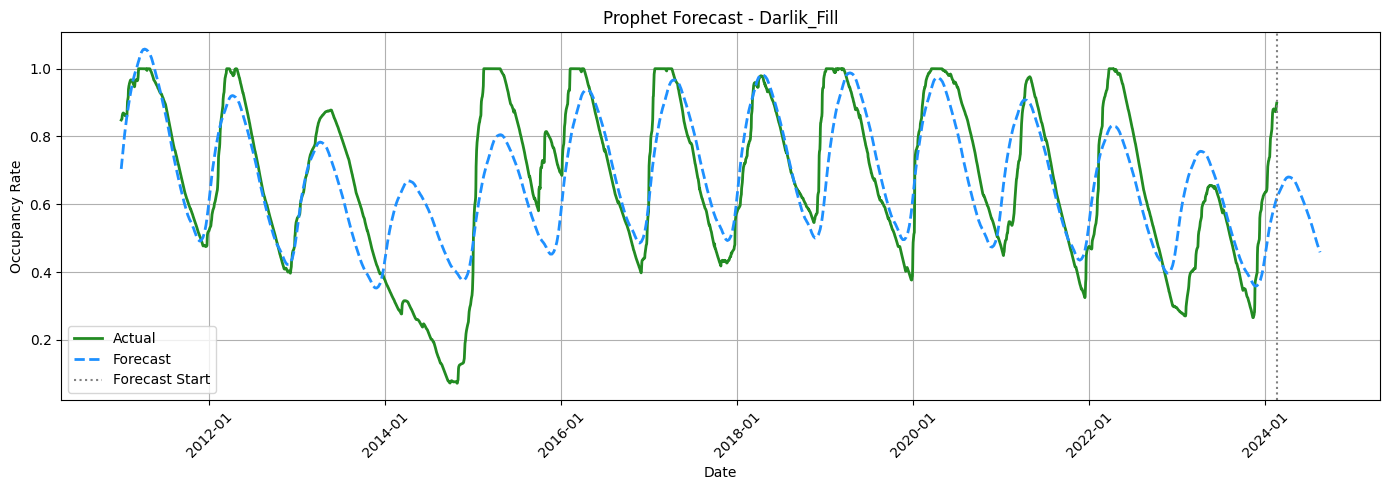

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_darlik.pkl


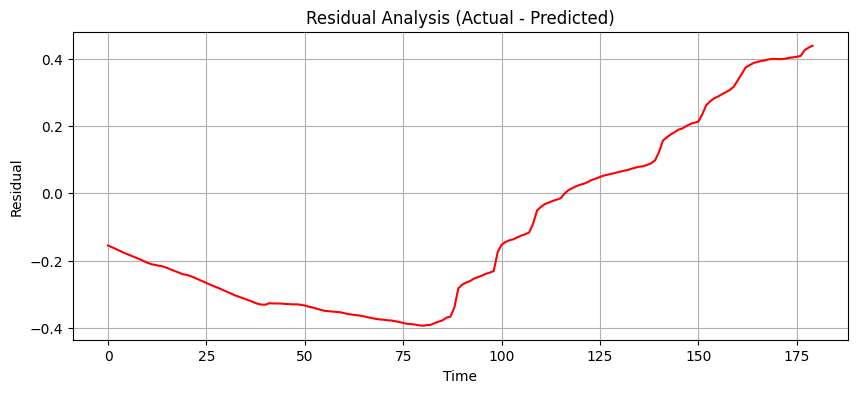


Training Prophet for Elmali_Fill


16:42:04 - cmdstanpy - INFO - Chain [1] start processing
16:42:05 - cmdstanpy - INFO - Chain [1] done processing


Elmali_Fill | MAE: 0.39 | RMSE: 0.41


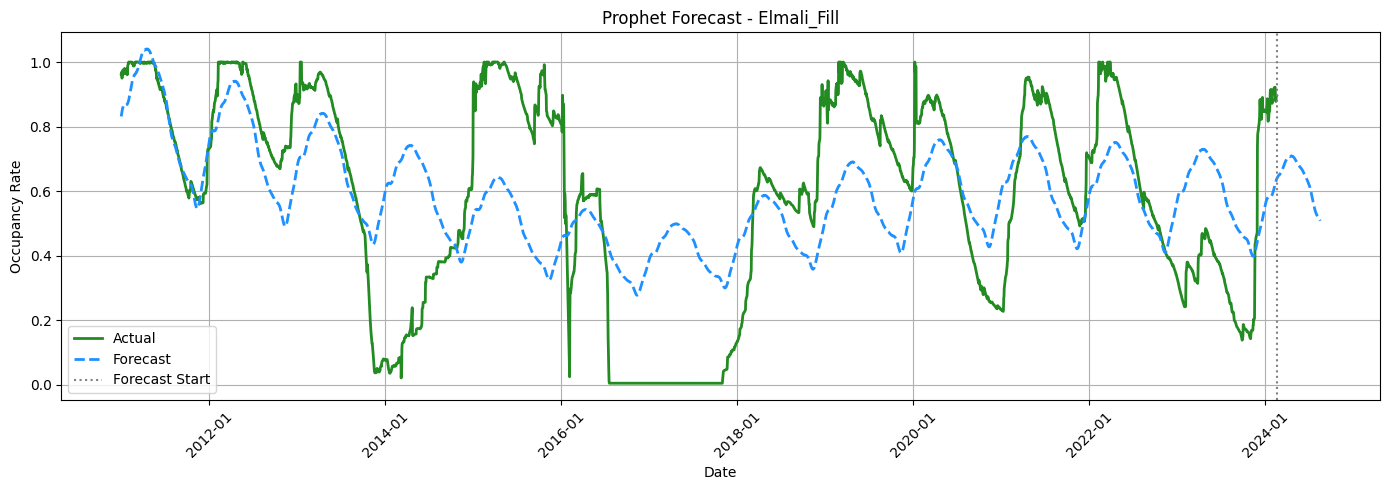

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_elmali.pkl


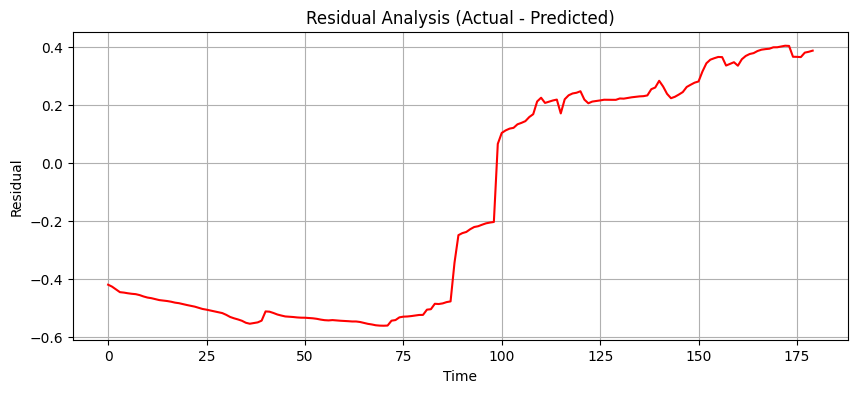


Training Prophet for Terkos_Fill


16:42:06 - cmdstanpy - INFO - Chain [1] start processing
16:42:06 - cmdstanpy - INFO - Chain [1] done processing


Terkos_Fill | MAE: 0.25 | RMSE: 0.27


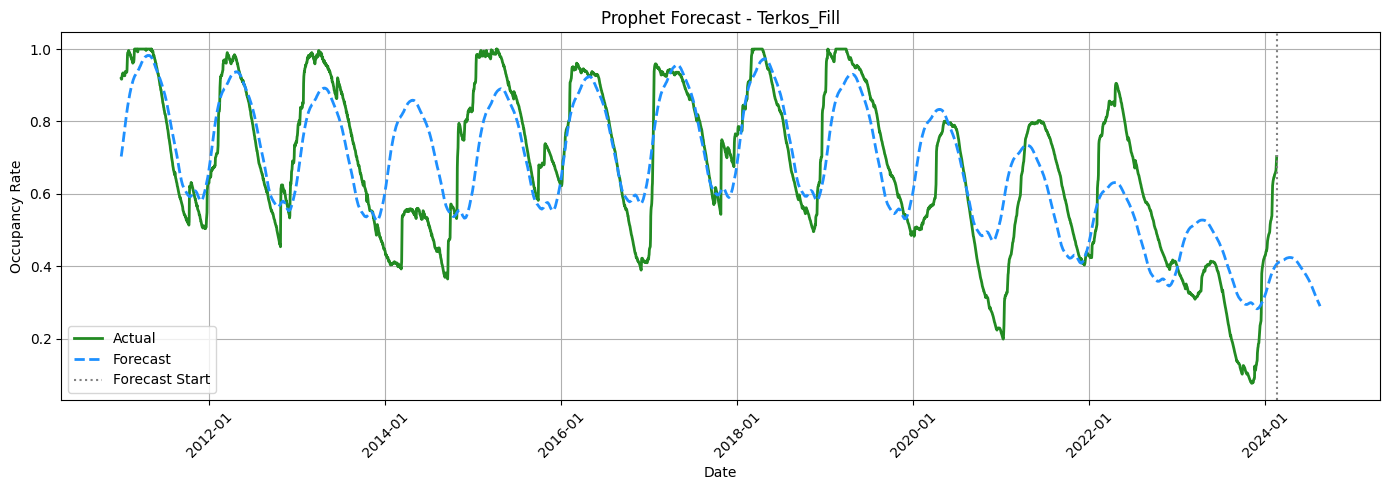

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_terkos.pkl


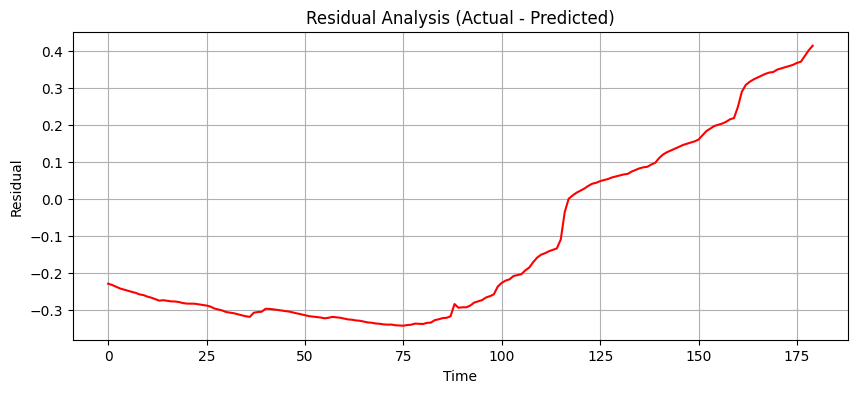


Training Prophet for Alibey_Fill


16:42:07 - cmdstanpy - INFO - Chain [1] start processing
16:42:08 - cmdstanpy - INFO - Chain [1] done processing


Alibey_Fill | MAE: 0.25 | RMSE: 0.3


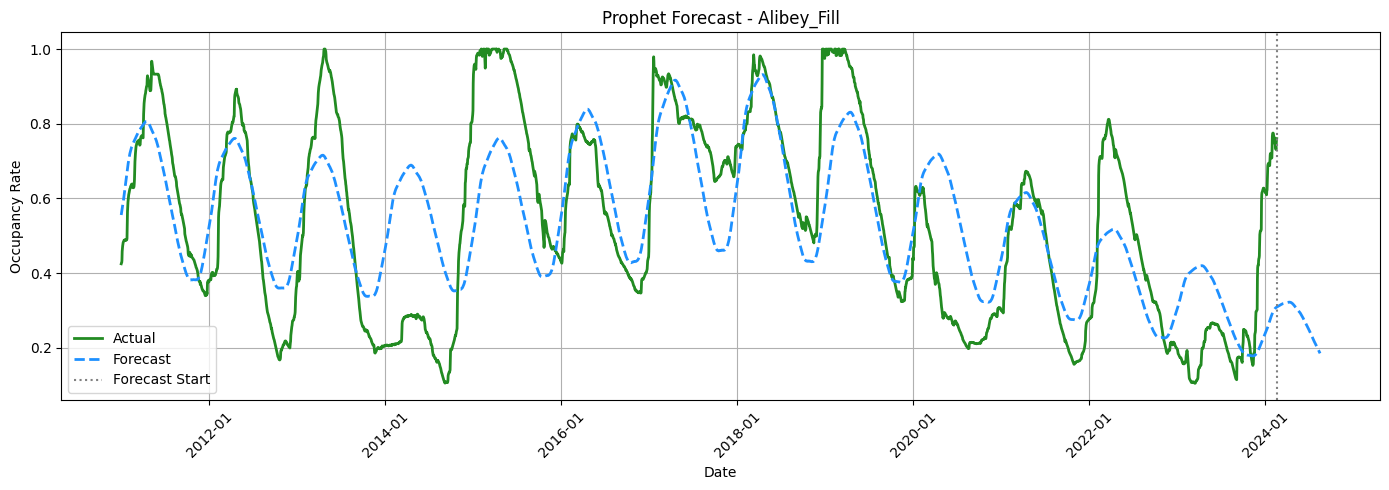

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_alibey.pkl


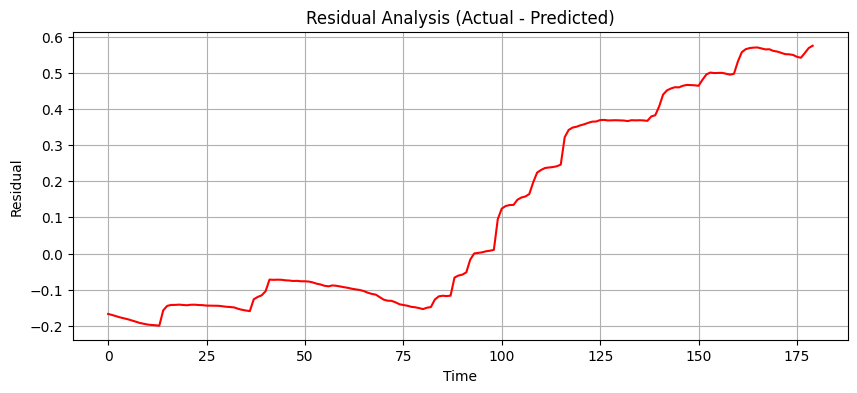


Training Prophet for Sazlidere_Fill


16:42:09 - cmdstanpy - INFO - Chain [1] start processing
16:42:09 - cmdstanpy - INFO - Chain [1] done processing


Sazlidere_Fill | MAE: 0.23 | RMSE: 0.25


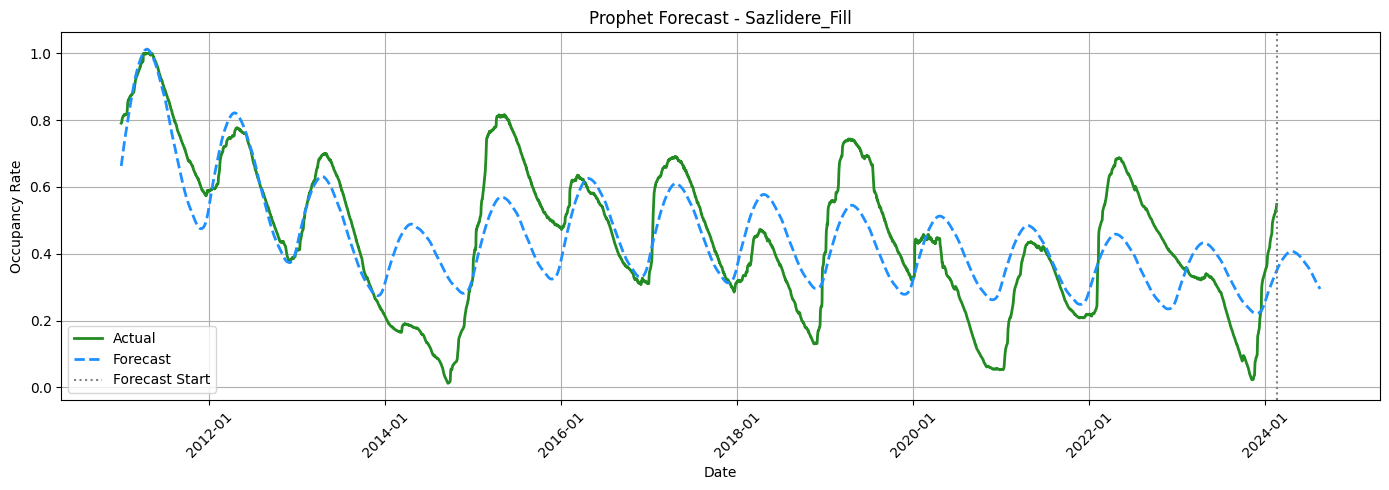

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_sazlidere.pkl


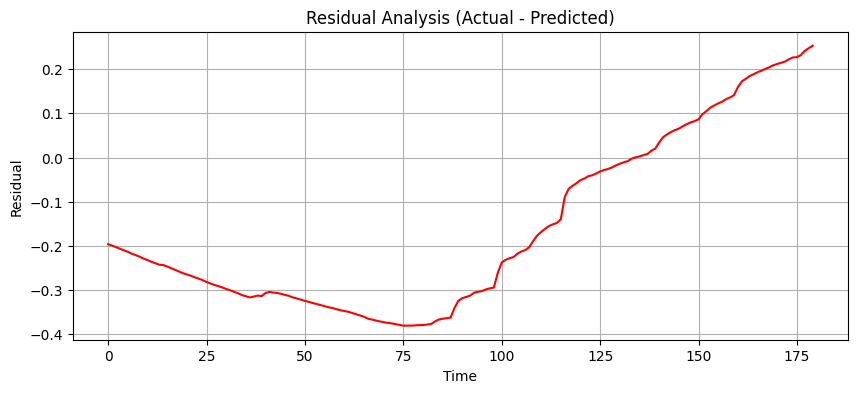


Training Prophet for Kazandere_Fill


16:42:11 - cmdstanpy - INFO - Chain [1] start processing
16:42:12 - cmdstanpy - INFO - Chain [1] done processing


Kazandere_Fill | MAE: 0.23 | RMSE: 0.25


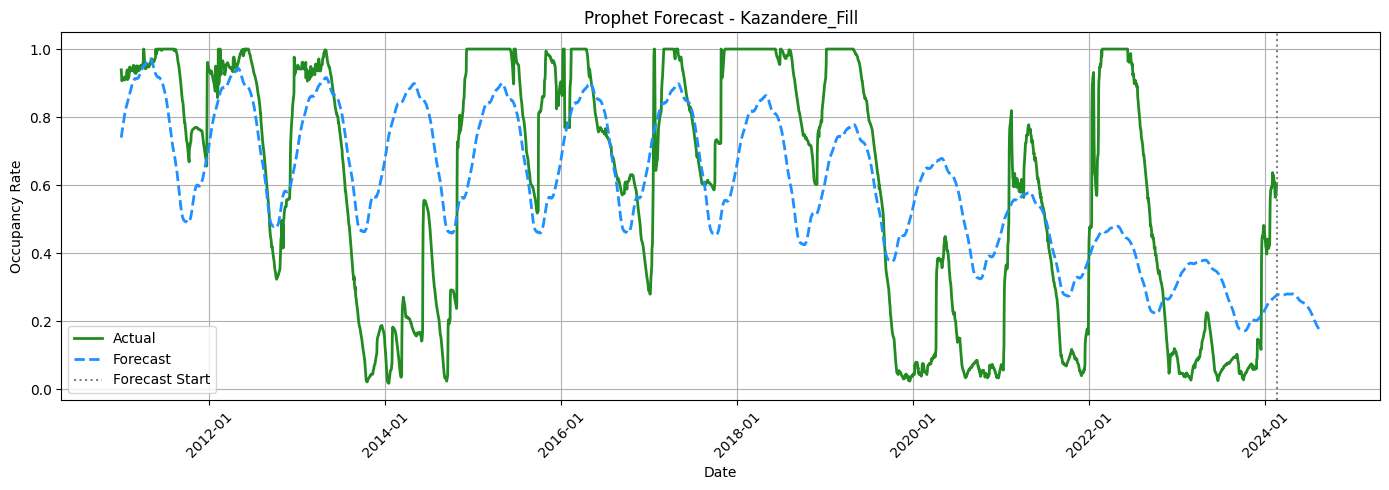

Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_kazandere.pkl


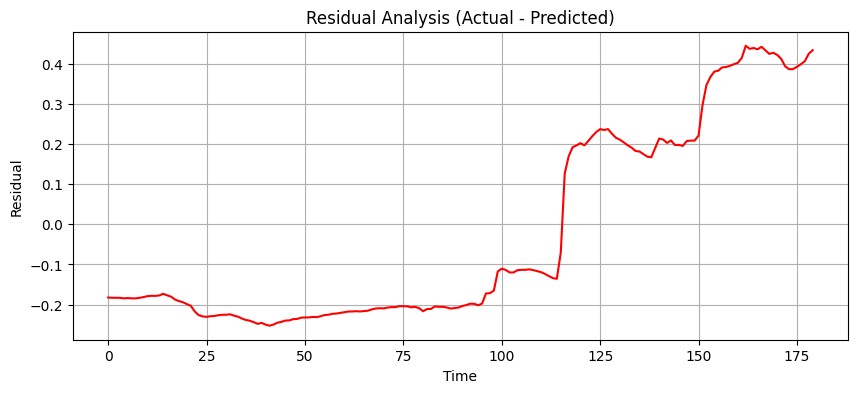

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import joblib

# Loading the merged dam-specific dataset
df = pd.read_csv("../data/processed/merged_dam_specific.csv")
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Selecting _Fill columns only
dam_columns = [col for col in df.columns if col.endswith('_Fill')]

for dam_col in dam_columns:
    print(f"\nTraining Prophet for {dam_col}")

    # Preparing dataframe for Prophet
    df_prophet = df[['Tarih', dam_col]].rename(columns={'Tarih': 'ds', dam_col: 'y'}).dropna()

    # Initializing and training Prophet model
    model = Prophet(seasonality_mode='multiplicative',
                    changepoint_prior_scale=0.01,
                    yearly_seasonality=20)

    model.fit(df_prophet)

    # Creating future dataframe for 180 days
    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Evaluation
    actual = df_prophet.set_index('ds').y[-180:].values
    predicted = forecast.set_index('ds').yhat[-180:].values[-180:]

    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"{dam_col} | MAE: {round(mae, 2)} | RMSE: {round(rmse, 2)}")

    # Plotting
    plt.figure(figsize=(14, 5))
    plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual', color='forestgreen', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='dodgerblue', linestyle='--', linewidth=2)
    plt.axvline(df_prophet['ds'].iloc[-1], color='gray', linestyle=':', linewidth=1.5, label='Forecast Start')
    plt.title(f"Prophet Forecast - {dam_col}")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Saving model
    model_name = dam_col.replace('_Fill', '').lower()
    joblib.dump(model, f"../models/multivariate_models_with_extra_inputs/prophet_{model_name}.pkl")
    print(f"Model saved as: ../models/multivariate_models_with_extra_inputs/prophet_{model_name}.pkl")

    

    residuals = actual - predicted
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, color='red')
    plt.title('Residual Analysis (Actual - Predicted)')
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.grid()
    plt.show()



       Tarih    Ömerli    Darlık    Elmalı    Terkos  Alibey  Büyükçekmece  \
0 2000-10-23  0.652551  0.750151  0.789792  0.708568     0.0      0.521442   
1 2000-10-24  0.659731  0.773031  0.817187  0.710344     0.0      0.521442   
2 2000-10-25  0.663327  0.787929  0.826667  0.708568     0.0      0.519666   
3 2000-10-26  0.662608  0.793250  0.828125  0.706792     0.0      0.517889   
4 2000-10-27  0.660450  0.795911  0.828125  0.706792     0.0      0.516113   

   Sazlıdere  Kazandere  Pabuçdere  Istrancalar  
0   0.505489   0.057499   0.068553     0.110953  
1   0.506952   0.057499   0.069092     0.077226  
2   0.506952   0.057499   0.069361     0.105593  
3   0.506952   0.057499   0.069624     0.114171  
4   0.505489   0.057499   0.066667     0.114017  

Processing dam: Ömerli

Prophet model for Ömerli


01:13:08 - cmdstanpy - INFO - Chain [1] start processing
01:13:12 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.14
Prophet RMSE (Test Set): 0.17


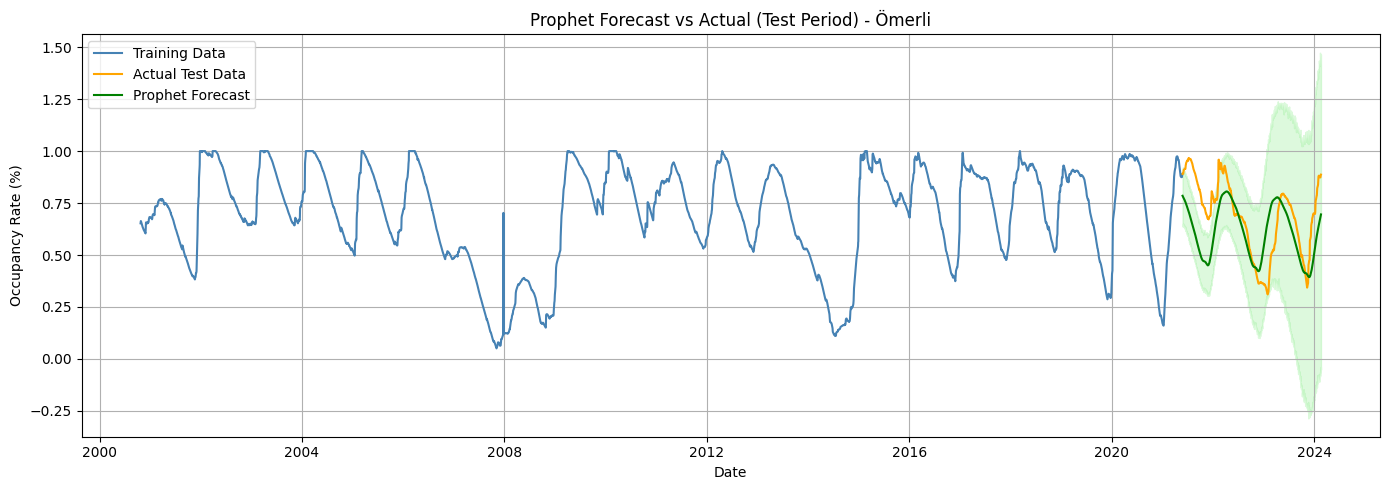


SARIMA model for Ömerli


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.28
SARIMA RMSE (Test Set): 0.34


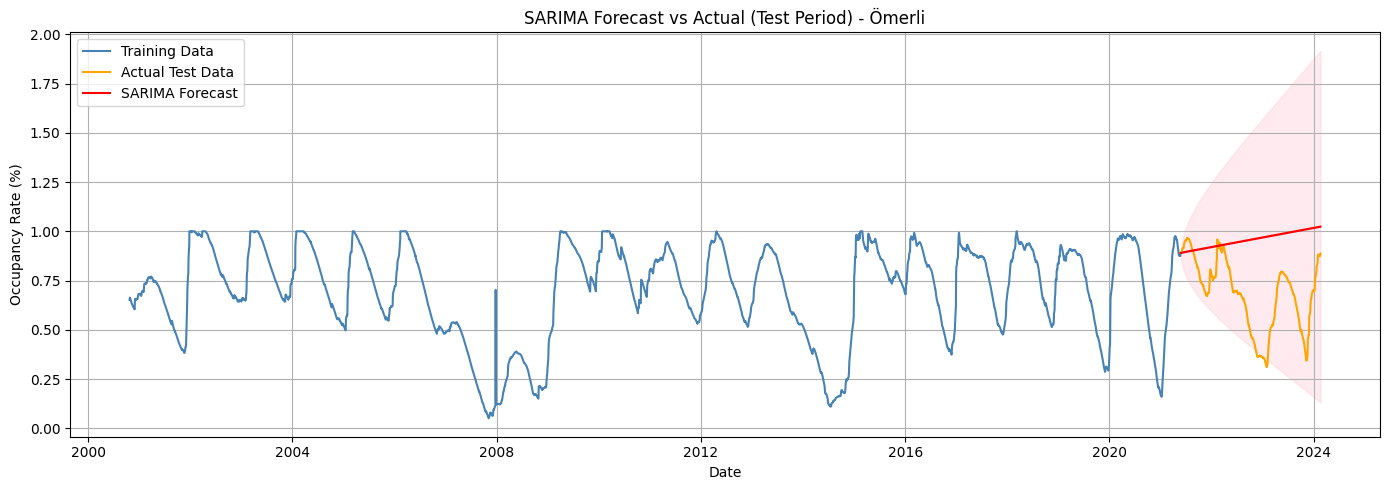


Processing dam: Darlık

Prophet model for Darlık


01:13:21 - cmdstanpy - INFO - Chain [1] start processing
01:13:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.15
Prophet RMSE (Test Set): 0.21


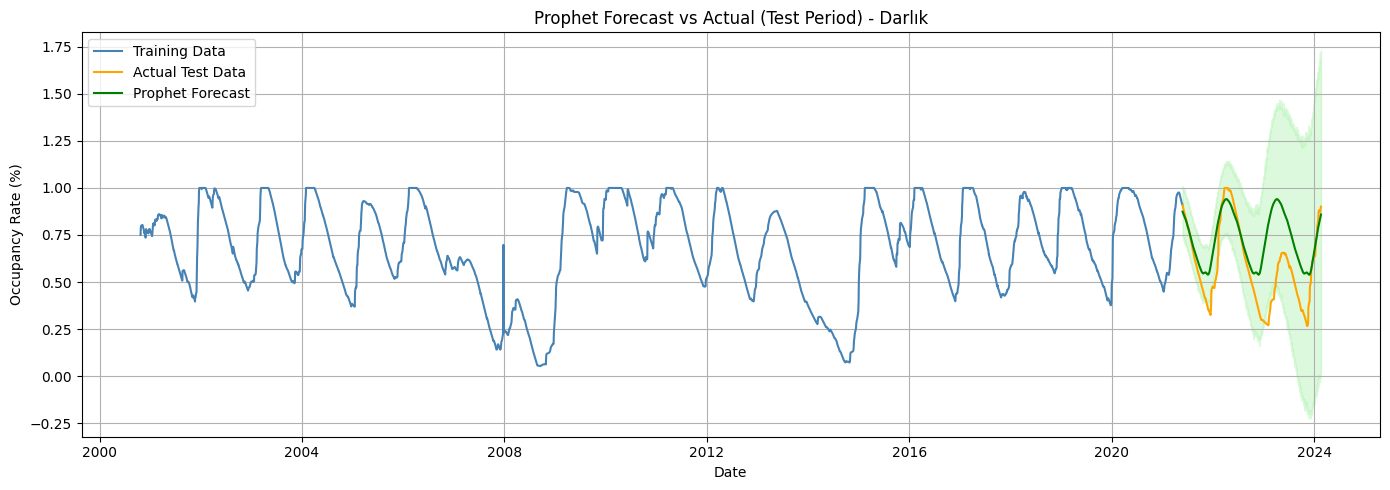


SARIMA model for Darlık


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.37
SARIMA RMSE (Test Set): 0.43


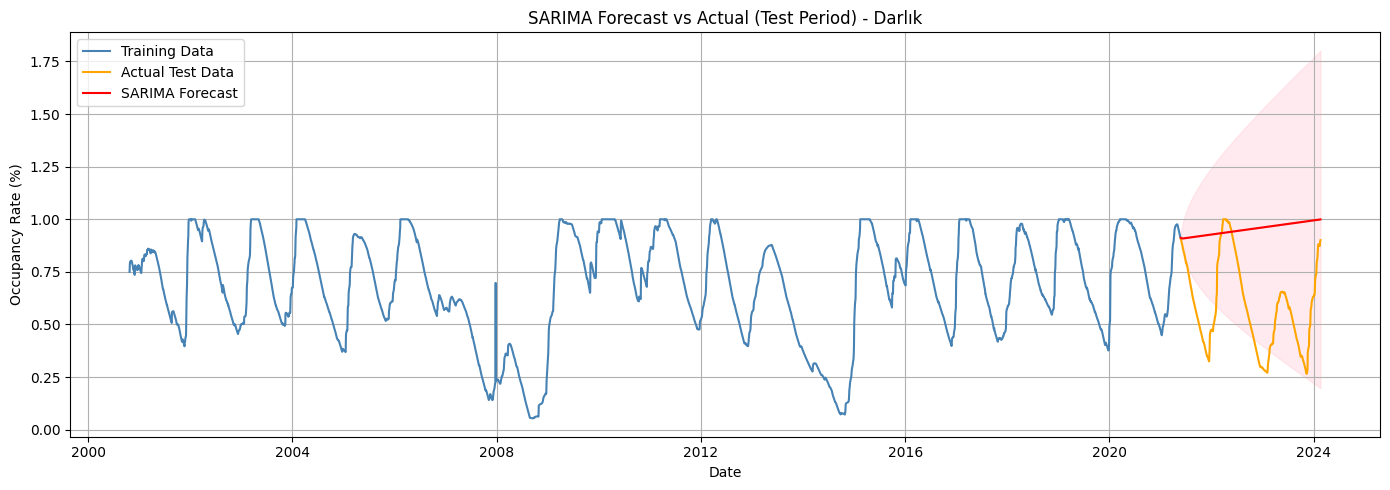


Processing dam: Elmalı

Prophet model for Elmalı


01:13:40 - cmdstanpy - INFO - Chain [1] start processing
01:13:43 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.47
Prophet RMSE (Test Set): 0.56


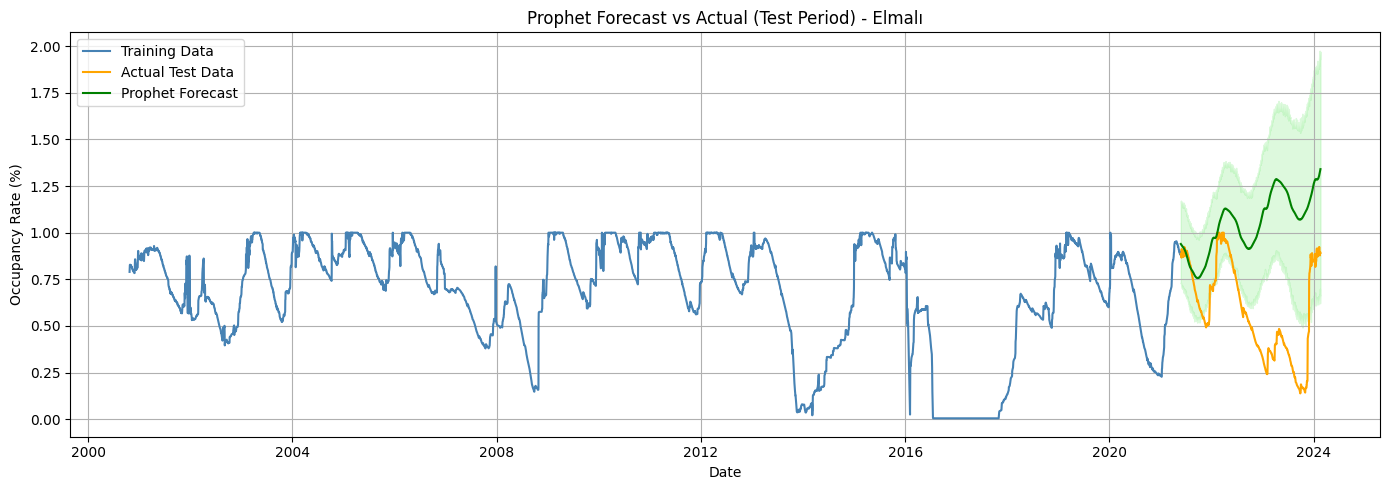


SARIMA model for Elmalı


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.32
SARIMA RMSE (Test Set): 0.40


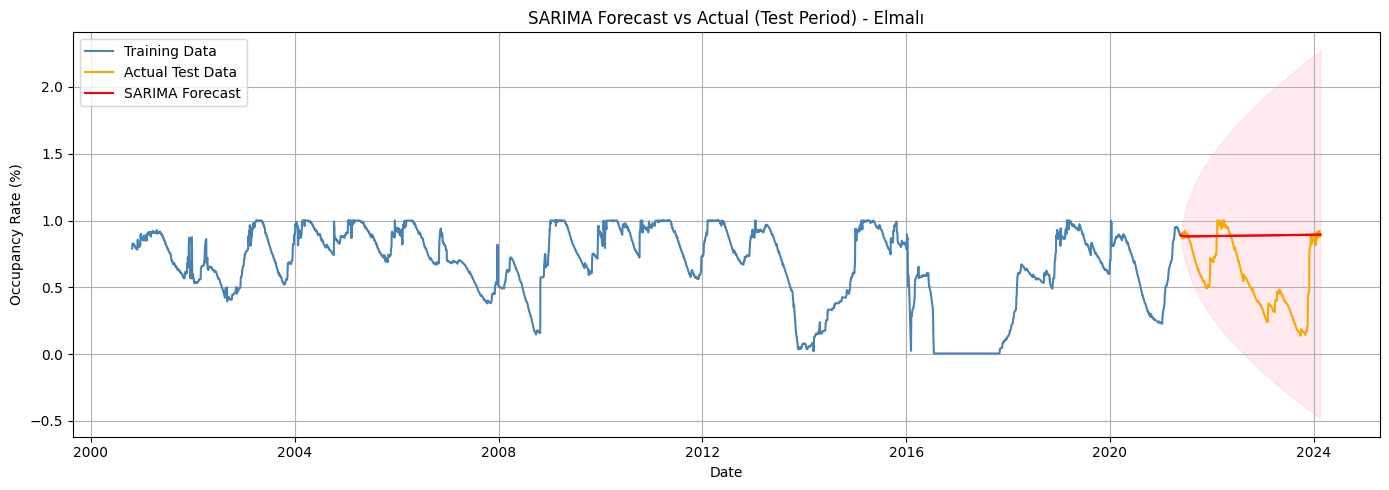


Processing dam: Terkos

Prophet model for Terkos


01:13:54 - cmdstanpy - INFO - Chain [1] start processing
01:13:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.15
Prophet RMSE (Test Set): 0.17


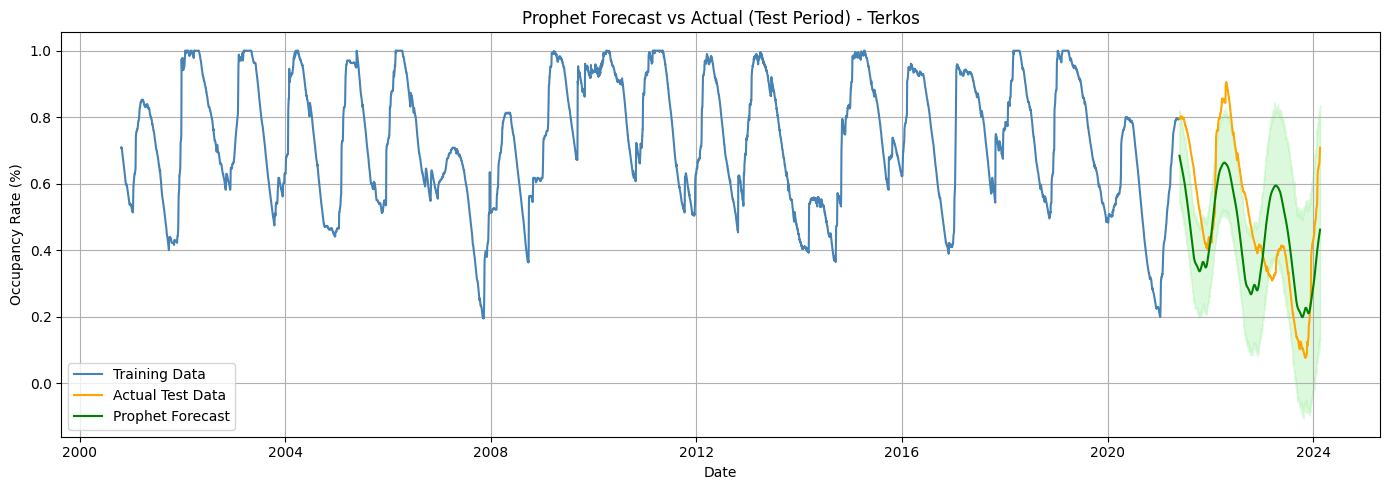


SARIMA model for Terkos
SARIMA MAE (Test Set): 0.34
SARIMA RMSE (Test Set): 0.40


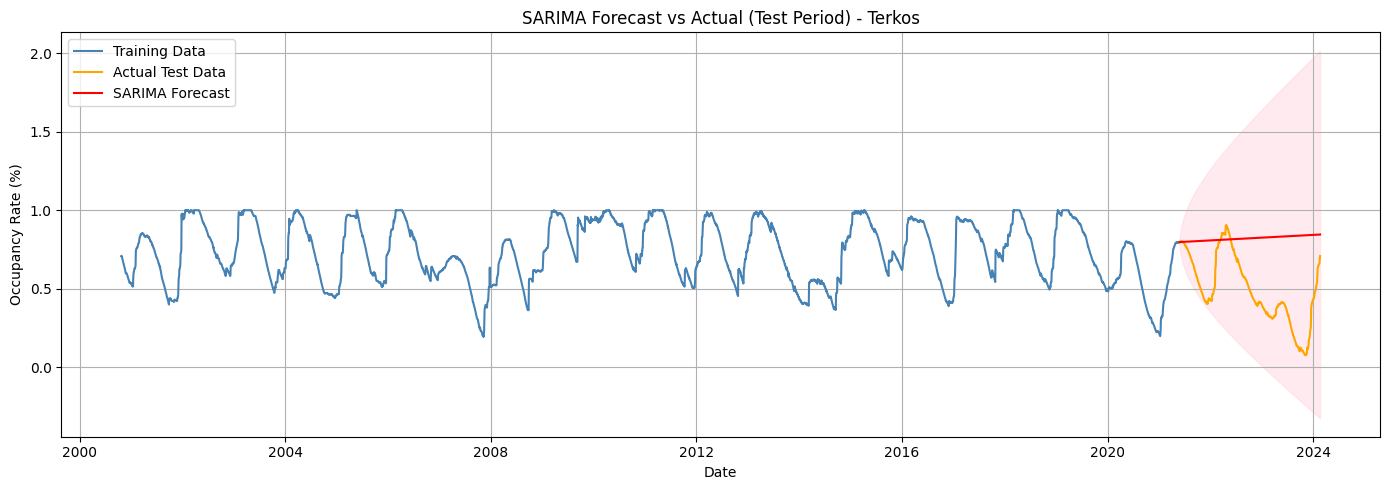


Processing dam: Alibey

Prophet model for Alibey


01:14:08 - cmdstanpy - INFO - Chain [1] start processing
01:14:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.19
Prophet RMSE (Test Set): 0.23


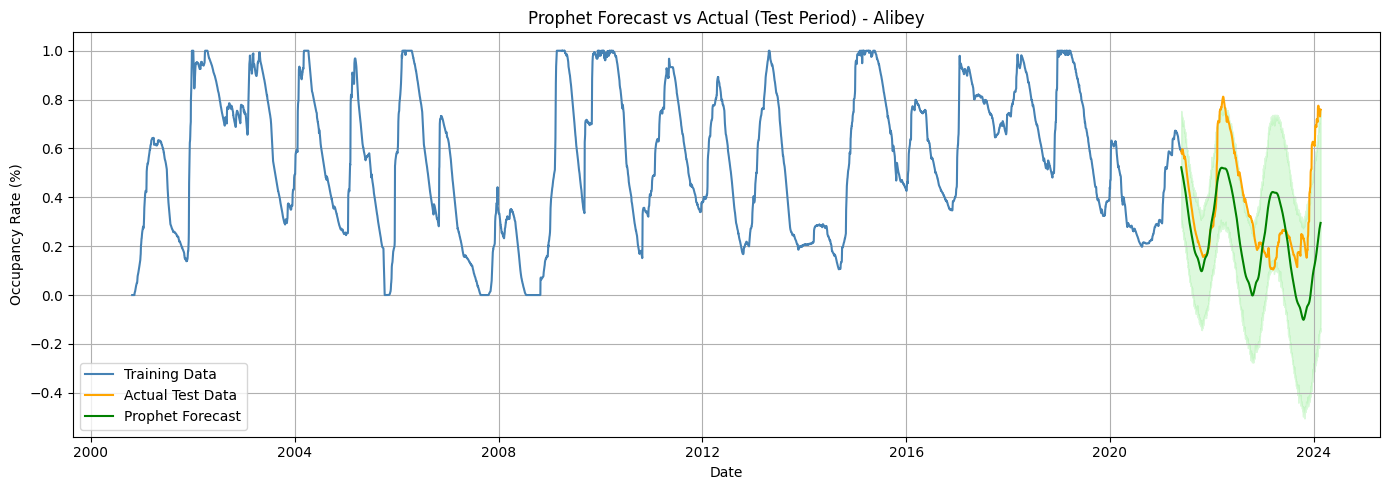


SARIMA model for Alibey


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.28
SARIMA RMSE (Test Set): 0.31


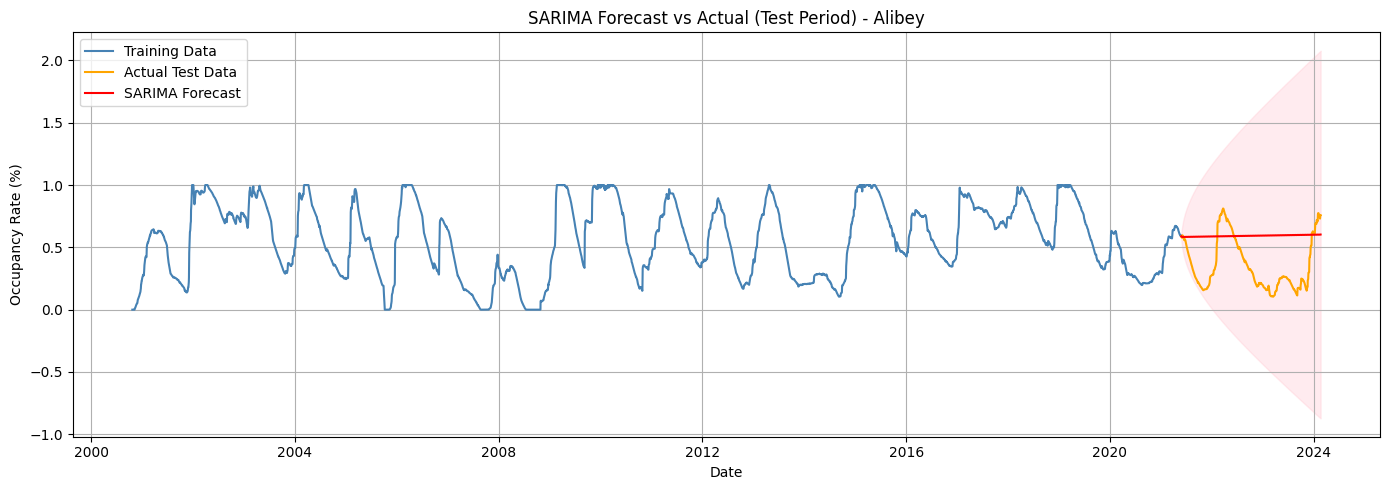


Processing dam: Büyükçekmece

Prophet model for Büyükçekmece


01:14:18 - cmdstanpy - INFO - Chain [1] start processing
01:14:21 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.22
Prophet RMSE (Test Set): 0.25


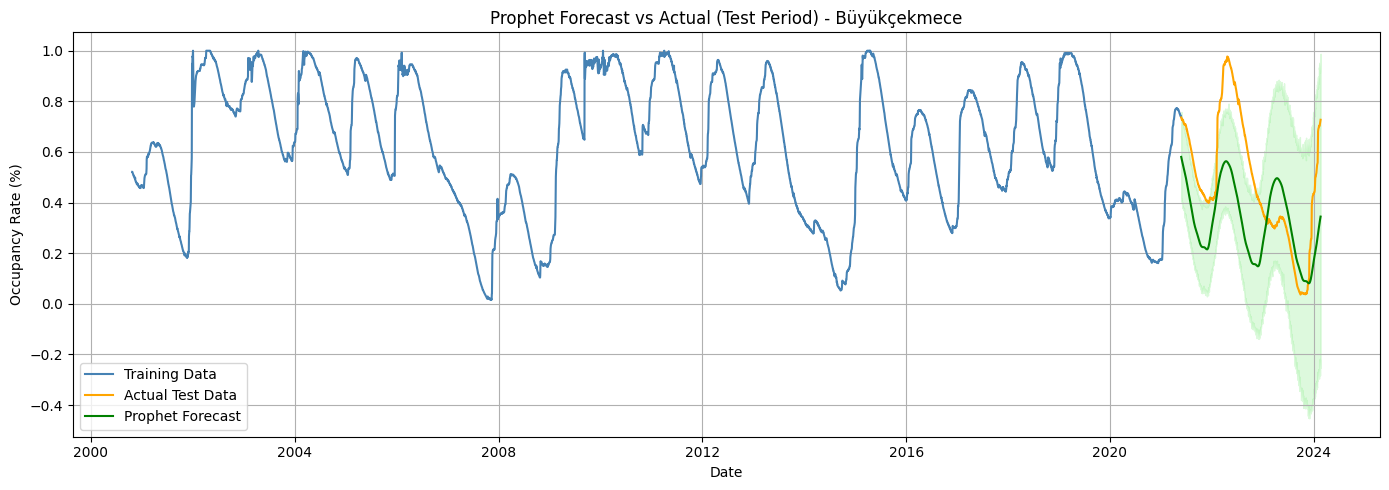


SARIMA model for Büyükçekmece


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.32
SARIMA RMSE (Test Set): 0.38


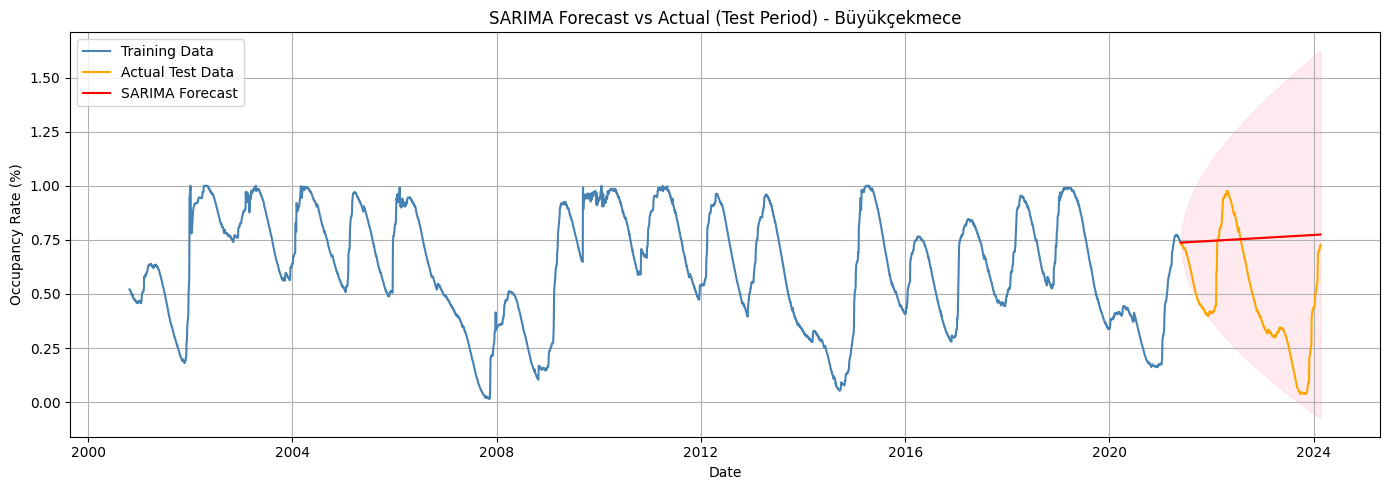


Processing dam: Sazlıdere

Prophet model for Sazlıdere


01:14:33 - cmdstanpy - INFO - Chain [1] start processing
01:14:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.18
Prophet RMSE (Test Set): 0.22


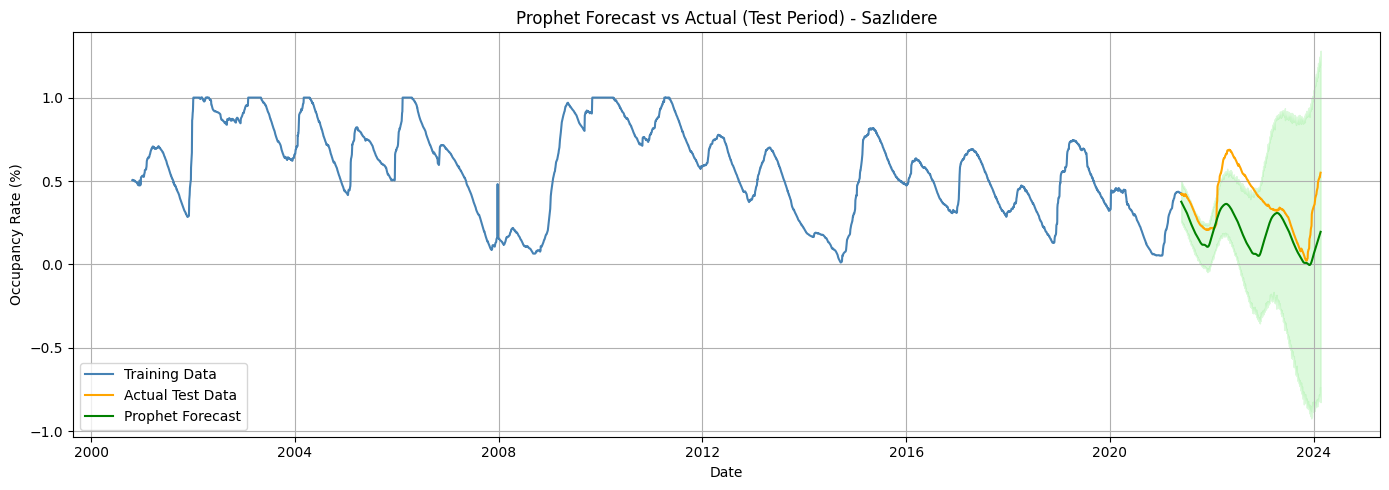


SARIMA model for Sazlıdere


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.14
SARIMA RMSE (Test Set): 0.17


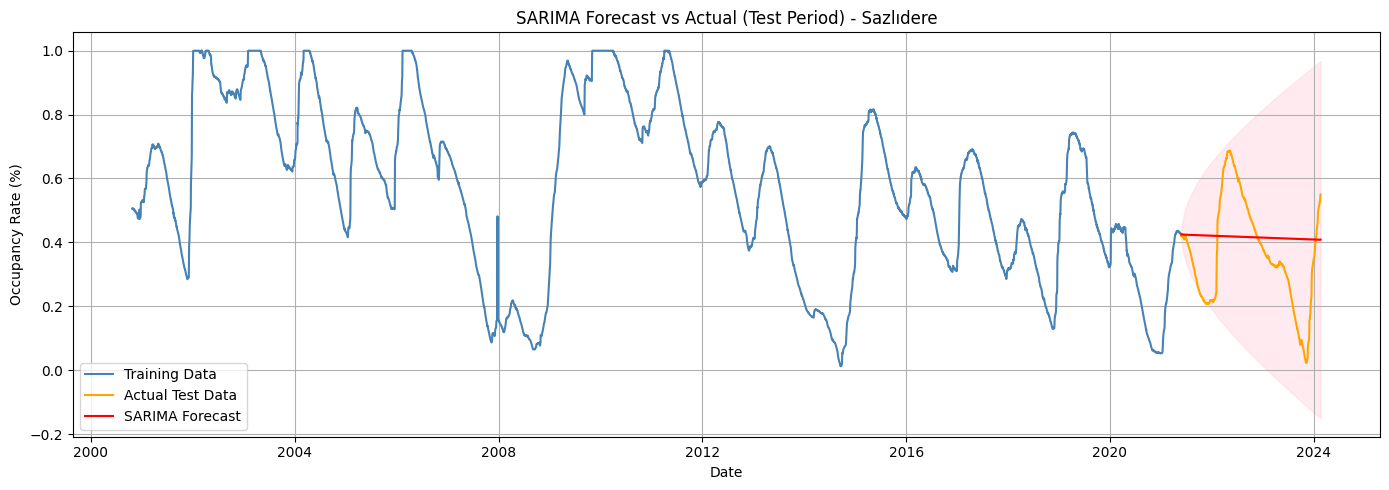


Processing dam: Kazandere

Prophet model for Kazandere


01:14:45 - cmdstanpy - INFO - Chain [1] start processing
01:14:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.37
Prophet RMSE (Test Set): 0.47


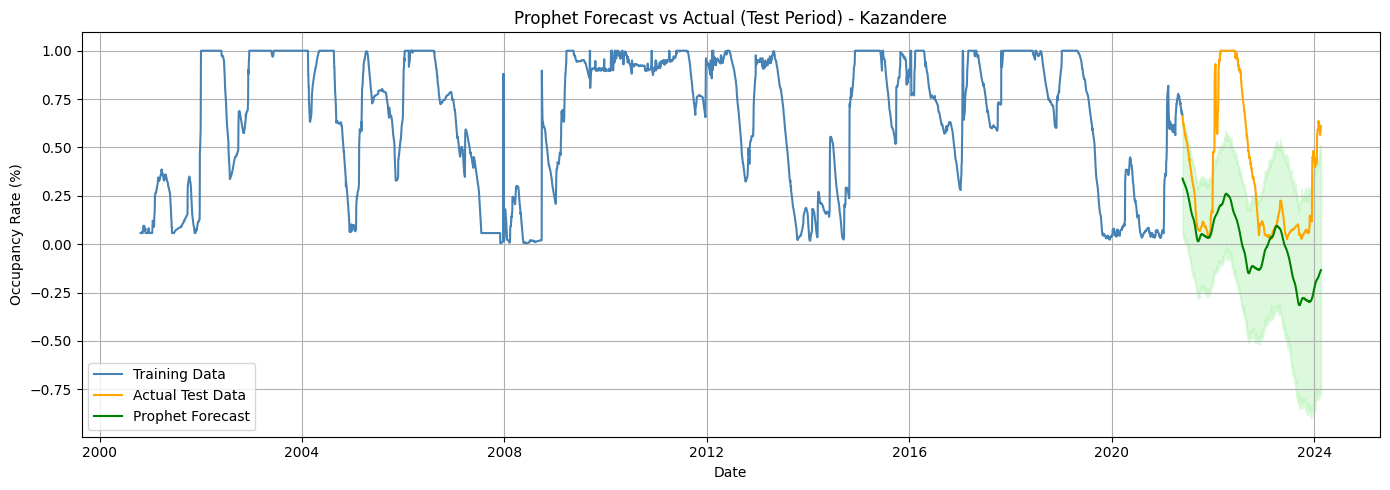


SARIMA model for Kazandere


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.44
SARIMA RMSE (Test Set): 0.49


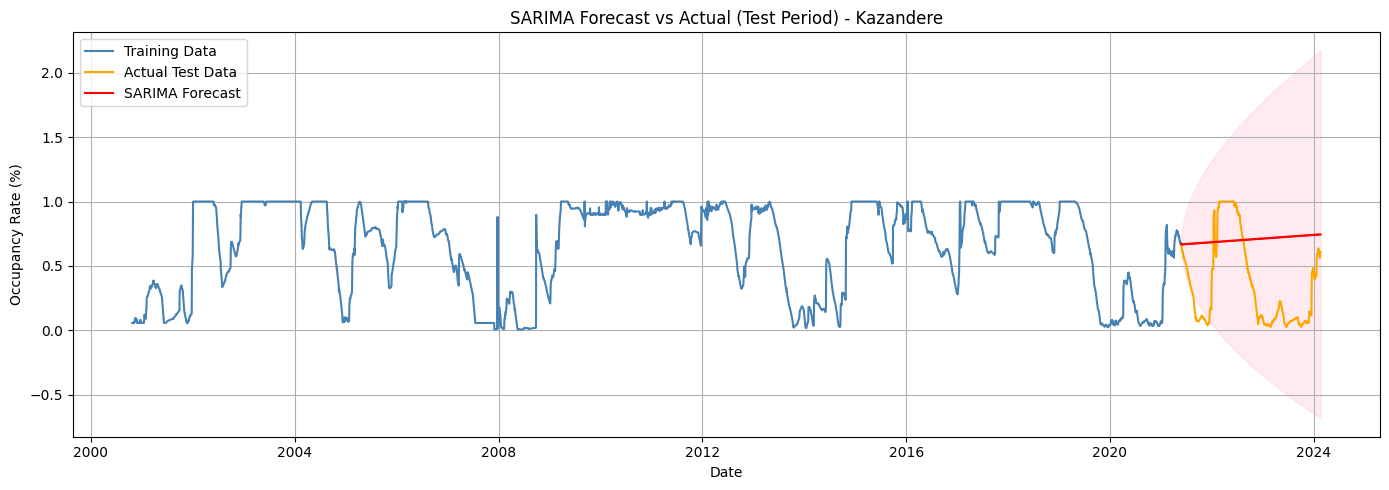


Processing dam: Pabuçdere

Prophet model for Pabuçdere


01:15:00 - cmdstanpy - INFO - Chain [1] start processing
01:15:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.38
Prophet RMSE (Test Set): 0.47


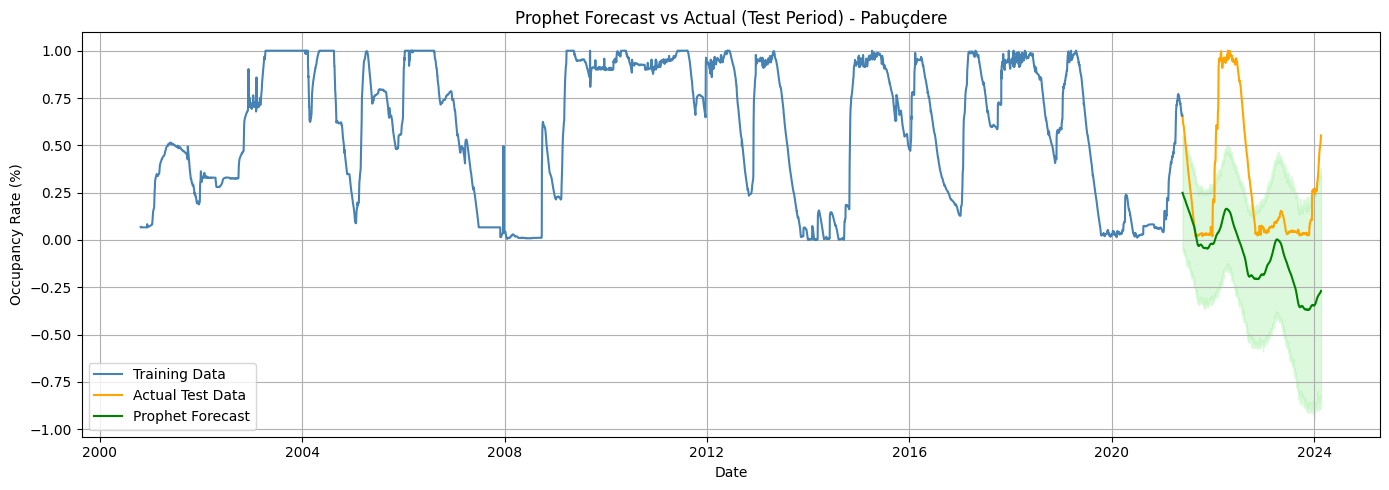


SARIMA model for Pabuçdere


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.45
SARIMA RMSE (Test Set): 0.49


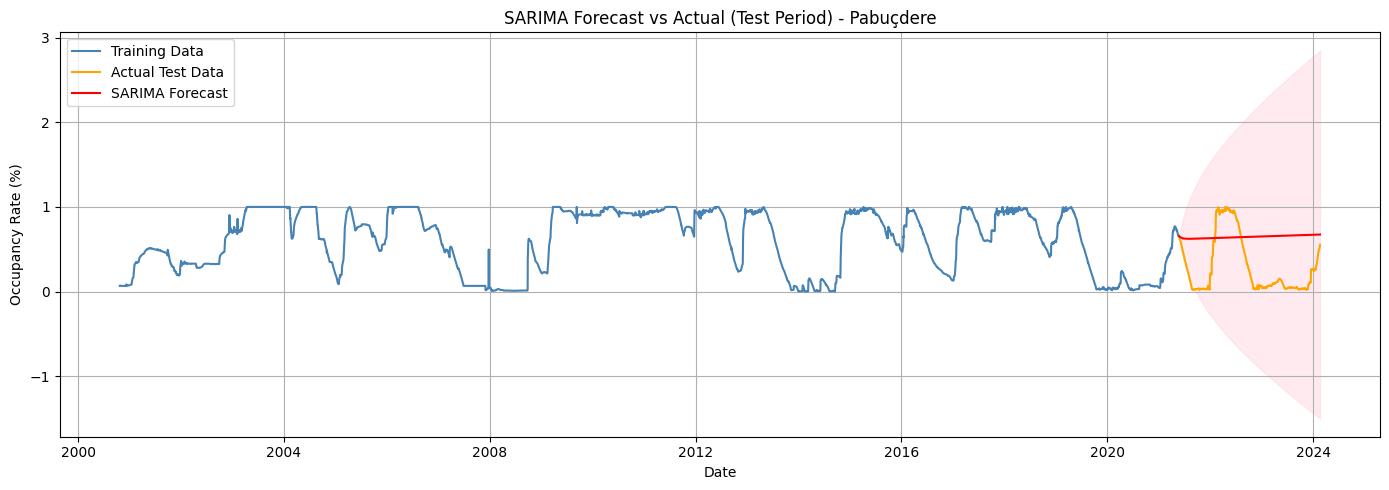


Processing dam: Istrancalar

Prophet model for Istrancalar


01:15:18 - cmdstanpy - INFO - Chain [1] start processing
01:15:20 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE (Test Set): 0.24
Prophet RMSE (Test Set): 0.32


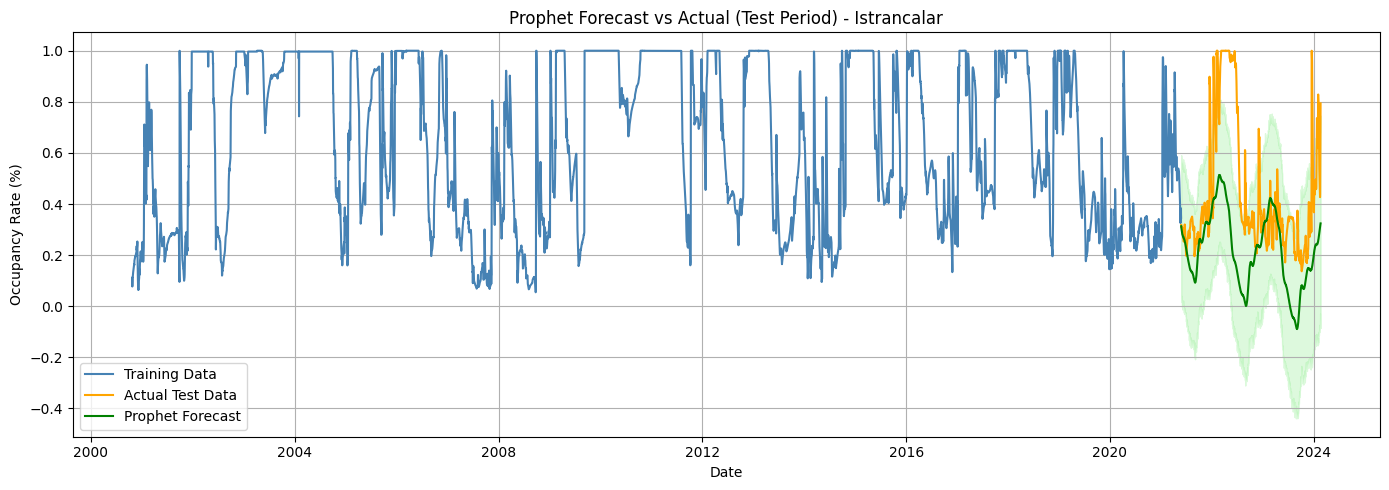


SARIMA model for Istrancalar


C:\Users\merta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE (Test Set): 0.18
SARIMA RMSE (Test Set): 0.29


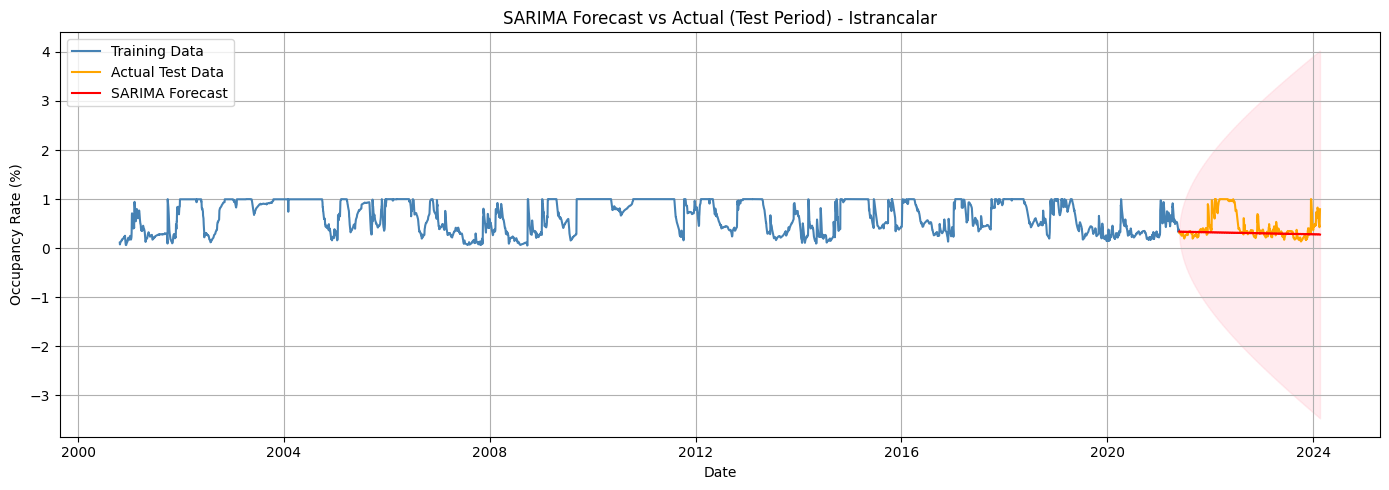

In [1]:
# Importing necessary libraries for data manipulation, modeling, and evaluation
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Loading the dam-specific dataset
df = pd.read_excel("../data/raw/istanbul-dams-daily-occupancy-rates.xlsx")

# Converting the 'Tarih' column to datetime using automatic detection with dayfirst
df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)

# Checking the first few rows of the dataset to confirm data structure
print(df.head())

# Listing dam columns (excluding 'Tarih')
dams = df.columns[1:]

# Iterating over each dam to implement Prophet and SARIMA models along with performance evaluation
for dam in dams:
    print(f"\nProcessing dam: {dam}")

    # Preparing data for Prophet and SARIMA models
    dam_df = df[['Tarih', dam]].dropna().rename(columns={'Tarih': 'ds', dam: 'y'})

    # Splitting the data into train and test sets (last 30 days for testing)
    train_df = dam_df[:-1000]
    test_df = dam_df[-1000:]

    # -------------------- Prophet Model --------------------
    print(f"\nProphet model for {dam}")
    model_prophet = Prophet()
    model_prophet.fit(train_df)

    # Forecasting the test period
    future = test_df[['ds']]
    forecast = model_prophet.predict(future)

    # Calculating performance metrics for Prophet
    mae_prophet = mean_absolute_error(test_df['y'], forecast['yhat'])
    rmse_prophet = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat']))

    print(f"Prophet MAE (Test Set): {mae_prophet:.2f}")
    print(f"Prophet RMSE (Test Set): {rmse_prophet:.2f}")

    # Plotting Prophet forecast vs actual
    plt.figure(figsize=(14,5))
    plt.plot(train_df['ds'], train_df['y'], label='Training Data', color='steelblue')
    plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data', color='orange')
    plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='green')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.3)
    plt.title(f"Prophet Forecast vs Actual (Test Period) - {dam}")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -------------------- SARIMA Model --------------------
    print(f"\nSARIMA model for {dam}")

    # Preparing the time series for SARIMA (ensuring DatetimeIndex and setting daily frequency explicitly)
    dam_series = dam_df.set_index('ds')['y']
    train_series = dam_series[:-1000].asfreq('D')
    test_series = dam_series[-1000:]  # test_series already DatetimeIndex, keeping as is

    # Fitting SARIMA model with default parameters (now no frequency warning)
    model_sarima = sm.tsa.statespace.SARIMAX(train_series, order=(1,1,1), seasonal_order=(1,1,1,12))
    result_sarima = model_sarima.fit()

    # Forecasting test period
    forecast_sarima = result_sarima.get_forecast(steps=1000)
    pred_sarima = forecast_sarima.predicted_mean
    ci_sarima = forecast_sarima.conf_int()

    # Calculating performance metrics for SARIMA
    mae_sarima = mean_absolute_error(test_series, pred_sarima)
    rmse_sarima = np.sqrt(mean_squared_error(test_series, pred_sarima))

    print(f"SARIMA MAE (Test Set): {mae_sarima:.2f}")
    print(f"SARIMA RMSE (Test Set): {rmse_sarima:.2f}")

    # Plotting SARIMA forecast vs actual
    plt.figure(figsize=(14,5))
    plt.plot(train_series.index, train_series, label='Training Data', color='steelblue')
    plt.plot(test_series.index, test_series, label='Actual Test Data', color='orange')
    plt.plot(test_series.index, pred_sarima, label='SARIMA Forecast', color='red')
    plt.fill_between(test_series.index, ci_sarima.iloc[:, 0], ci_sarima.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f"SARIMA Forecast vs Actual (Test Period) - {dam}")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
